In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [2]:
dataSet = pd.read_csv("iris.csv")
print(dataSet.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
df = pd.DataFrame(dataSet)
data =  pd.DataFrame(dataSet)

Data Wrangling

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.columns.to_list()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [6]:
df.set_index("Id",inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.rename(columns = {"Id":"ID","SepalLengthCm":"SL","SepalWidthCm":"SW","PetalLengthCm":"PL","PetalWidthCm":"PW","Species":"SP"},inplace=True)

In [10]:
df["SP"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df.head()

,SL,SW,PL,PW,SP
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
from sklearn.preprocessing import LabelEncoder


In [13]:
label_encoder = LabelEncoder()
df['SP'] = label_encoder.fit_transform(df['SP'])
df.tail()

,SL,SW,PL,PW,SP
Id,,,,,
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2
150,5.9,3.0,5.1,1.8,2


In [42]:
df["Species"] = df["SP"].apply(lambda x :data["Species"].unique()[x] if x < len(data["Species"].unique()) else None)

In [17]:
df_setosa = df[df["SP"]==0]
df_versicolor = df[df["SP"]==1]
df_virginica = df[df["SP"]==2]



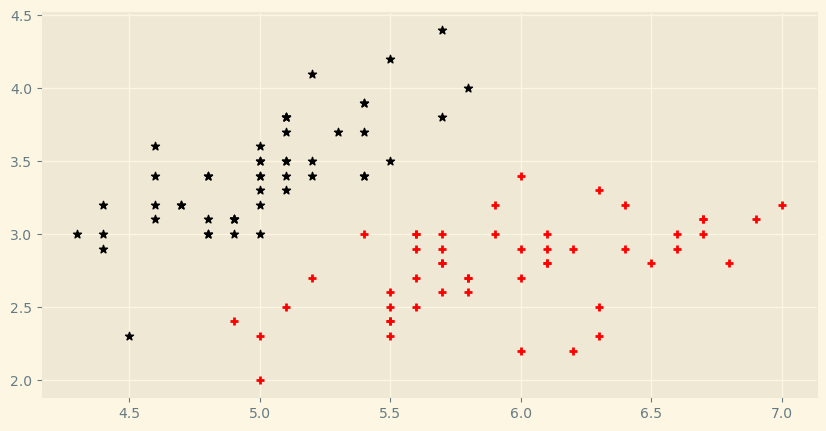

In [24]:
# plt.scatter()
plt.figure(figsize=(10,5))
plt.style.use("Solarize_Light2")
plt.scatter(df_setosa["SL"],df_setosa["SW"],color="black",marker="*")
plt.scatter(df_versicolor["SL"],df_versicolor["SW"],color="red",marker="+")

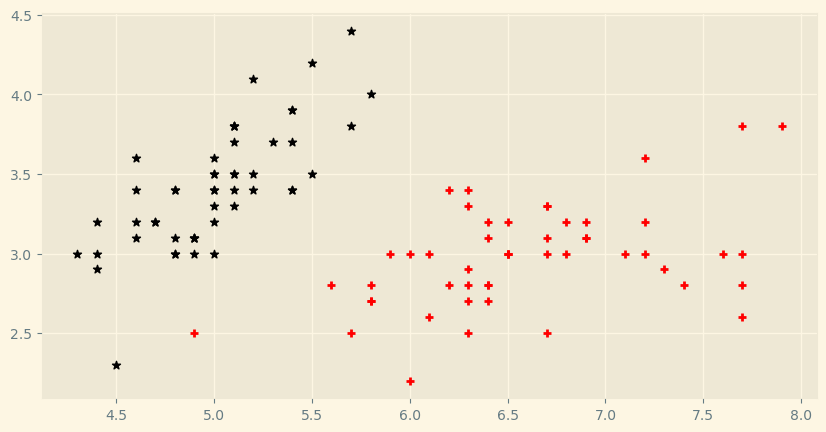

In [25]:
plt.figure(figsize=(10,5))
plt.style.use("Solarize_Light2")
plt.scatter(df_setosa["SL"],df_setosa["SW"],color="black",marker="*")
plt.scatter(df_virginica["SL"],df_virginica["SW"],color="red",marker="+")

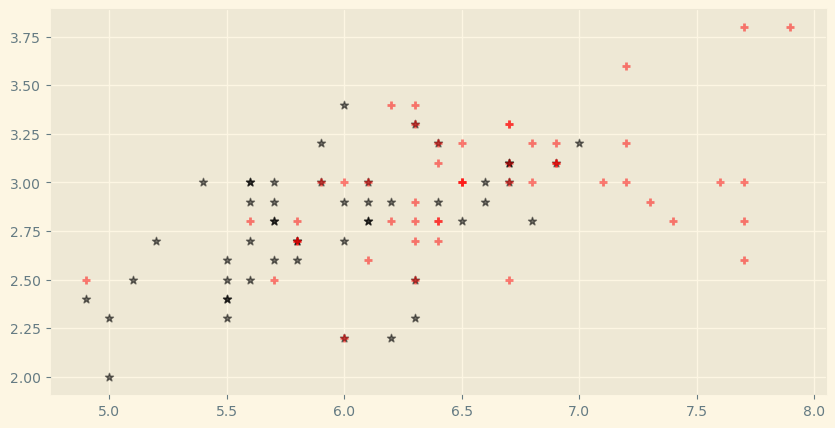

In [33]:
plt.figure(figsize=(10,5))
plt.style.use("Solarize_Light2")
plt.scatter(df_versicolor["SL"],df_versicolor["SW"],color="black",marker="*",alpha=0.5)
plt.scatter(df_virginica["SL"],df_virginica["SW"],color="red",marker="+",alpha=0.5)

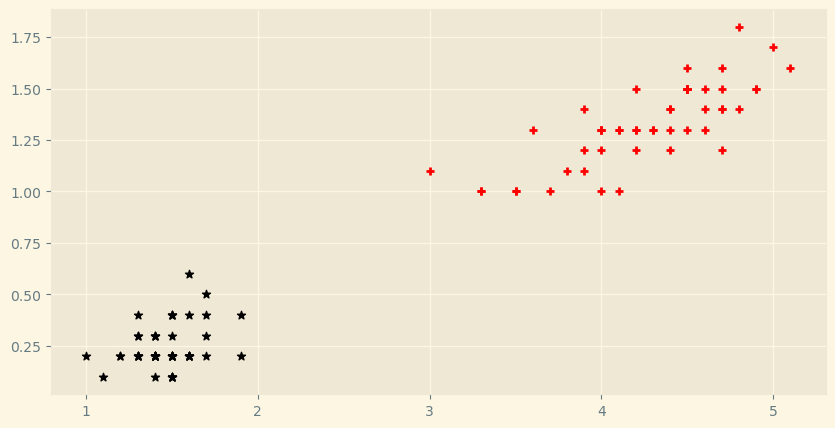

In [27]:
plt.figure(figsize=(10,5))
plt.style.use("Solarize_Light2")
plt.scatter(df_setosa["PL"],df_setosa["PW"],color="black",marker="*")
plt.scatter(df_versicolor["PL"],df_versicolor["PW"],color="red",marker="+")

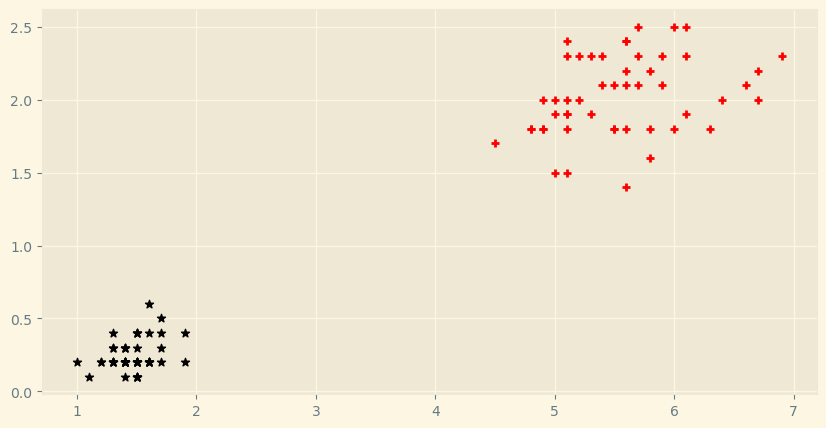

In [28]:
plt.figure(figsize=(10,5))
plt.style.use("Solarize_Light2")
plt.scatter(df_setosa["PL"],df_setosa["PW"],color="black",marker="*")
plt.scatter(df_virginica["PL"],df_virginica["PW"],color="red",marker="+")

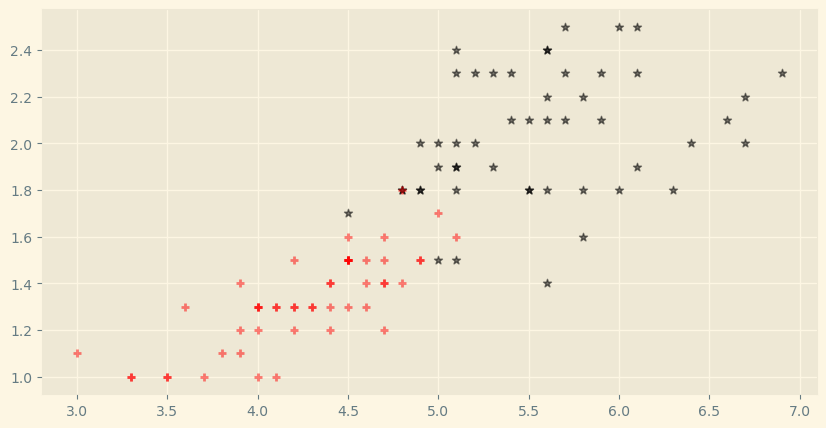

In [31]:
plt.figure(figsize=(10,5))
plt.style.use("Solarize_Light2")
plt.scatter(df_virginica["PL"],df_virginica["PW"],color="black",marker="*",alpha=0.5)
plt.scatter(df_versicolor["PL"],df_versicolor["PW"],color="red",marker="+",alpha=0.5)

In [56]:
X = df.drop(["Species","SP"],axis=1)
Y = df["SP"]


In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [58]:
model = SVC()

In [59]:
model.fit(x_train,y_train)

SVC()

In [60]:
model.score(x_test,y_test)

0.9666666666666667

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9333333333333333

In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9666666666666667

In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9666666666666667

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9666666666666667